## Importing the necessary packages

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Reading the train and test file

In [3]:


train = pd.read_csv("data.csv", names=["label","tweet"])

#train_original=train.copy()

train =train.loc[:854999]

df_t = pd.read_csv('test.csv')

test = pd.DataFrame(columns=['tweet'])
test['tweet'] = df_t[df_t.columns[0:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#test_original=test.copy()

train.head()

test.head()
print(train.shape)

print(test.shape)

(855000, 2)
(24000, 1)


In [4]:
#test.loc[[6]]

train.head()

,label,tweet
0,0,Where I'm at there's no starbucks for miles. I...
1,1,Gossip Girl? me thinks so!!
2,1,I took Bentley on his first walk today.
3,0,burnt her finger over an hour ago and it is st...
4,1,@jordanknight i hope you had a great BDAY


# Data Pre-Processing

## STEP — 1 : Combine the train.csv and test.csv files.

In [4]:
combine = train.append(test,ignore_index=True)

combine.head()

c:\users\aravi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,label,tweet
0,0.0,Where I'm at there's no starbucks for miles. I...
1,1.0,Gossip Girl? me thinks so!!
2,1.0,I took Bentley on his first walk today.
3,0.0,burnt her finger over an hour ago and it is st...
4,1.0,@jordanknight i hope you had a great BDAY


## STEP — 2 Removing Twitter Handles(@User)

In [5]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,str(text))
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",str(text))
    
    return text

combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,label,tweet,Tidy_Tweets
0,0.0,Where I'm at there's no starbucks for miles. I...,Where I'm at there's no starbucks for miles. I...
1,1.0,Gossip Girl? me thinks so!!,Gossip Girl? me thinks so!!
2,1.0,I took Bentley on his first walk today.,I took Bentley on his first walk today.
3,0.0,burnt her finger over an hour ago and it is st...,burnt her finger over an hour ago and it is st...
4,1.0,@jordanknight i hope you had a great BDAY,i hope you had a great BDAY


## STEP — 3 Removing Punctuation, Numbers, and Special Characters

In [6]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

combine.head(10)

,label,tweet,Tidy_Tweets
0,0.0,Where I'm at there's no starbucks for miles. I...,Where I m at there s no starbucks for miles I...
1,1.0,Gossip Girl? me thinks so!!,Gossip Girl me thinks so
2,1.0,I took Bentley on his first walk today.,I took Bentley on his first walk today
3,0.0,burnt her finger over an hour ago and it is st...,burnt her finger over an hour ago and it is st...
4,1.0,@jordanknight i hope you had a great BDAY,i hope you had a great BDAY
5,1.0,@nileyxlove thank you,thank you
6,1.0,@Sweetnesss357 Thanks for the FF Have a good ...,Thanks for the FF Have a good weekend
7,1.0,@LoBosworth Post a picture with your Tweet Lo,Post a picture with your Tweet Lo
8,0.0,@twitapps is there an issue with your ta_repli...,is there an issue with your ta replies servic...
9,1.0,@inebriation its never a problem Mikey I'm he...,its never a problem Mikey I m here for anyon...


## STEP — 4 Removing Short Words

In [7]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,label,tweet,Tidy_Tweets
0,0.0,Where I'm at there's no starbucks for miles. I...,Where there starbucks miles know checked
1,1.0,Gossip Girl? me thinks so!!,Gossip Girl thinks
2,1.0,I took Bentley on his first walk today.,took Bentley first walk today
3,0.0,burnt her finger over an hour ago and it is st...,burnt finger over hour still burnt crisp peas ...
4,1.0,@jordanknight i hope you had a great BDAY,hope great BDAY
5,1.0,@nileyxlove thank you,thank
6,1.0,@Sweetnesss357 Thanks for the FF Have a good ...,Thanks Have good weekend
7,1.0,@LoBosworth Post a picture with your Tweet Lo,Post picture with your Tweet
8,0.0,@twitapps is there an issue with your ta_repli...,there issue with your replies service seem ema...
9,1.0,@inebriation its never a problem Mikey I'm he...,never problem Mikey here anyone matter when la...


## STEP — 5 Tokenization

In [8]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0      [Where, there, starbucks, miles, know, checked]
1                               [Gossip, Girl, thinks]
2                  [took, Bentley, first, walk, today]
3    [burnt, finger, over, hour, still, burnt, cris...
4                                  [hope, great, BDAY]
Name: Tidy_Tweets, dtype: object

## STEP — 6 Stemming

In [9]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

#Now let’s stitch these tokens back together

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,label,tweet,Tidy_Tweets
0,0.0,Where I'm at there's no starbucks for miles. I...,where there starbuck mile know check
1,1.0,Gossip Girl? me thinks so!!,gossip girl think
2,1.0,I took Bentley on his first walk today.,took bentley first walk today
3,0.0,burnt her finger over an hour ago and it is st...,burnt finger over hour still burnt crisp pea a...
4,1.0,@jordanknight i hope you had a great BDAY,hope great bday


In [10]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


# Data Visualisation

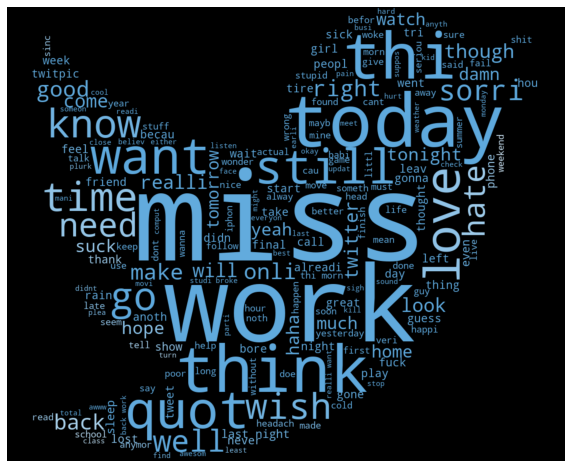

In [11]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests


all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])


 #combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()



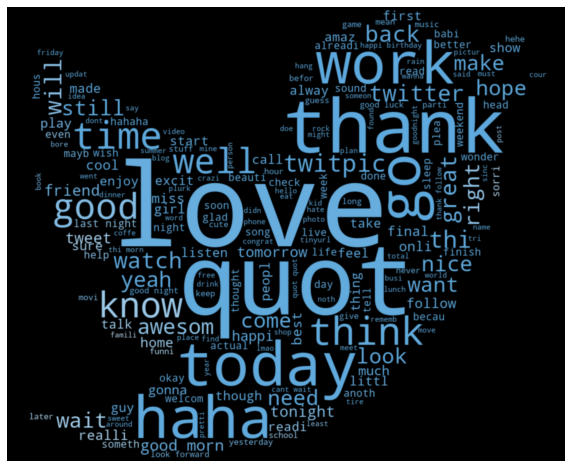

In [12]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])


# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

### Function to extract hashtags from tweets

In [13]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

### A nested list of all the hashtags from the positive reviews from the dataset.

In [14]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cake'],
 [],
 [],
 [],
 ['iphon', 'jailbreak'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['kevinjona', 'kevinjona'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [15]:
#Here we unnest the list
ht_positive_unnest = sum(ht_positive,[])

In [16]:
# A nested list of all the hashtags from the negative reviews from the dataset

ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['lidnug'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['redredheadhead'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['myweak'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['brighton'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['asot'],
 [

In [17]:
#Here we unnest the list

ht_negative_unnest = sum(ht_negative,[])

## Plotting Bar-plots

In [18]:
#For Positive Tweets in the dataset

#Counting the frequency of the words having Positive Sentiment

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'squarespac': 295, 'iranelect': 169, 'fail': 140, 'iphon': 128, 'inaperfectworld': 95, 'irememb': 82, 'asot': 72, 'trackl': 67, 'seb': 67, 'followfriday': 65, ...})

In [19]:
#Creating a dataframe for the most frequently used words in hashtags

df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,cake,1
1,iphon,128
2,jailbreak,4
3,kevinjona,17
4,twitter,26
5,digg,3
6,reasonsihatewint,1
7,bgt,58
8,holbyc,1
9,iranelect,169


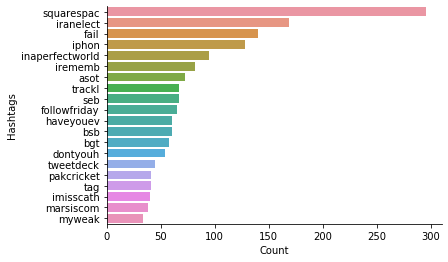

In [20]:
#Plotting the barplot for the 20 most frequent words used for hashtags

df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [21]:
#For Negative Tweets in the dataset

#Counting the frequency of the words having Negative Sentiment

word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'followfriday': 1216, 'seb': 210, 'musicmonday': 185, 'squarespac': 129, 'myweak': 115, 'shaunjumpnow': 113, 'delongeday': 101, 'asot': 94, 'mcflyforgermani': 83, 'marsiscom': 80, ...})

In [22]:
#Creating a dataframe for the most frequently used words in hashtags

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,lidnug,1
1,redredheadhead,1
2,myweak,115
3,brighton,2
4,asot,94
5,followfriday,1216
6,twitterwav,1
7,nofollow,1
8,madonna,1
9,haveyouev,34


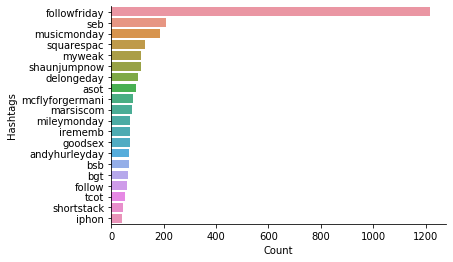

In [23]:
#Plotting the barplot for the 20 most frequent words used for hashtags

df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

## Bag-of-Words Features

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Features

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Models

## Splitting our dataset into Training and Validation Set

### Using the features from Bag-of-Words Model for training set

In [26]:
train_bow = bow[:855000]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [27]:
train_tfidf_matrix = tfidf_matrix[:855000]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [30]:
from sklearn.model_selection import train_test_split
# Bag-of-Words Features

x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

# Using TF-IDF features

x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

## Using Bag-of-Words Features

In [32]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[0.38922321, 0.61077679],
       [0.87329861, 0.12670139],
       [0.61830077, 0.38169923],
       ...,
       [0.39832954, 0.60167046],
       [0.51431629, 0.48568371],
       [0.25820271, 0.74179729]])

### Calculating the F1 score

In [33]:
from sklearn.metrics import f1_score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.7330769373000758

## Using TF-IDF Features

In [34]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

c:\users\aravi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[0.83402557, 0.16597443],
       [0.17290274, 0.82709726],
       [0.82167165, 0.17832835],
       ...,
       [0.5571997 , 0.4428003 ],
       [0.44085864, 0.55914136],
       [0.78281659, 0.21718341]])

In [35]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.7356218240586783

## XGBoost

In [36]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features

In [37]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

model_bow.fit(x_train_bow, y_train_bow)

# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.7253245699935718

### Using TF-IDF Features

In [38]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

model_tfidf.fit(x_train_tfidf, y_train_tfidf)

# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.7249199047806555

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [40]:
dct.fit(x_train_bow,y_train_bow)

dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.6995655275273976

### Using TF-IDF Features

In [41]:
dct.fit(x_train_tfidf,y_train_tfidf)

dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.693190087641895

# Model Comparison

In [42]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])


compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.733077,0.725325,0.699566,0.735622,0.72492,0.69319


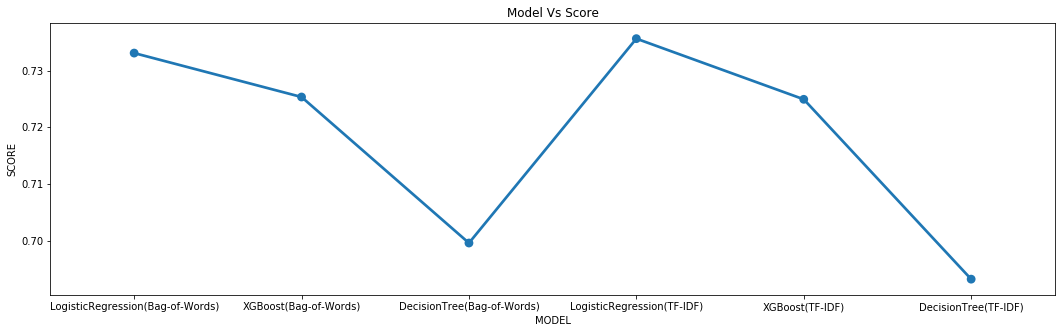

In [43]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

# Using the best possible model to predict for the test data

### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [ ]:
test_tfidf = tfidf_matrix[855000:]

test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

## Test dataset after prediction

In [ ]:
#res = pd.read_csv('result.csv')

#res.head()